In [24]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

# Ejercicio 5

In [ ]:
X = np.array([[0,0],[0,1],[-1,2],[2,0],[3,0],[4,-1]])
X

array([[ 0,  0],
       [ 0,  1],
       [-1,  2],
       [ 2,  0],
       [ 3,  0],
       [ 4, -1]])

In [ ]:
# Calcular la matriz de disimilaridades usando la distancia euclidiana
dissimilarity_matrix = squareform(pdist(X, metric='euclidean'))

print(dissimilarity_matrix)

[[0.         1.         2.23606798 2.         3.         4.12310563]
 [1.         0.         1.41421356 2.23606798 3.16227766 4.47213595]
 [2.23606798 1.41421356 0.         3.60555128 4.47213595 5.83095189]
 [2.         2.23606798 3.60555128 0.         1.         2.23606798]
 [3.         3.16227766 4.47213595 1.         0.         1.41421356]
 [4.12310563 4.47213595 5.83095189 2.23606798 1.41421356 0.        ]]


In [ ]:
# Definir los centroides iniciales
initial_centroids = np.array([X[0],X[5]])

In [ ]:
# Inicializar KMeans con los centroides iniciales
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, max_iter=300, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener los centroides finales y las etiquetas de los puntos
final_centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroides finales:")
print(final_centroids)
print("Etiquetas de los puntos:")
print(labels)


Centroides finales:
[[-0.33333333  1.        ]
 [ 3.         -0.33333333]]
Etiquetas de los puntos:
[0 0 0 1 1 1]


In [ ]:
punto = [1,1]
dist1 = np.linalg.norm(punto-final_centroids[0])
dist2 = np.linalg.norm(punto-final_centroids[1])

if dist1 < dist2:
    print(f"{punto} pertenece al grupo 1")
else:
    print(f"{punto} pertenece al grupo 2")

[1, 1] pertenece al grupo 1


# Ejercicio 8

In [18]:
# Definir la matriz de datos
X = np.array([[1,3],[0,4],[6,2],[5,2],[1,6]])

# Definir las etiquetas iniciales de los clusters
initial_labels = np.array([1,0,1,1,0])

In [23]:
np.zeros((2, X.shape[1]))

array([[0., 0.],
       [0., 0.]])

In [21]:
# Calcular los centroides iniciales
def calculate_initial_centroids(data, labels, n_clusters):
    centroids = np.zeros((n_clusters, data.shape[1]))
    for k in range(n_clusters):
        centroids[k] = data[labels == k].mean(axis=0)
    return centroids

# Número de clusters
n_clusters = 2

# Calcular los centroides iniciales
initial_centroids = calculate_initial_centroids(X, initial_labels, n_clusters)
initial_centroids

array([[0.5       , 5.        ],
       [4.        , 2.33333333]])

In [22]:
# Inicializar KMeans con los centroides iniciales
kmeans = KMeans(n_clusters=n_clusters, init=initial_centroids, n_init=1, max_iter=300, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener los centroides finales y las etiquetas de los puntos
final_centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroides finales:")
print(final_centroids)
print("Etiquetas de los puntos:")
print(labels)


Centroides finales:
[[0.66666667 4.33333333]
 [5.5        2.        ]]
Etiquetas de los puntos:
[0 0 1 1 0]


# Ejercicio 9

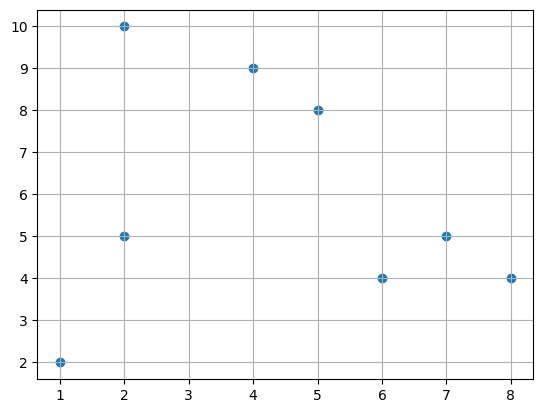

In [7]:
X = np.array([[2,10],[2,5],[8,4],[5,8],[7,5],[6,4],[1,2],[4,9]])
plt.scatter(X[:,0],X[:,1])
plt.grid()
plt.show()

In [8]:
# Calcular la matriz de disimilaridades usando la distancia euclidiana
dissimilarity_matrix = squareform(pdist(X, metric='euclidean'))

print(dissimilarity_matrix)

[[0.         5.         8.48528137 3.60555128 7.07106781 7.21110255
  8.06225775 2.23606798]
 [5.         0.         6.08276253 4.24264069 5.         4.12310563
  3.16227766 4.47213595]
 [8.48528137 6.08276253 0.         5.         1.41421356 2.
  7.28010989 6.40312424]
 [3.60555128 4.24264069 5.         0.         3.60555128 4.12310563
  7.21110255 1.41421356]
 [7.07106781 5.         1.41421356 3.60555128 0.         1.41421356
  6.70820393 5.        ]
 [7.21110255 4.12310563 2.         4.12310563 1.41421356 0.
  5.38516481 5.38516481]
 [8.06225775 3.16227766 7.28010989 7.21110255 6.70820393 5.38516481
  0.         7.61577311]
 [2.23606798 4.47213595 6.40312424 1.41421356 5.         5.38516481
  7.61577311 0.        ]]


In [10]:
# Inicializar KMeans con los centroides iniciales
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=1, max_iter=300, random_state=42)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener los centroides finales y las etiquetas de los puntos
final_centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroides finales:")
print(final_centroids)
print("Etiquetas de los puntos:")
print(labels)


Centroides finales:
[[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]
Etiquetas de los puntos:
[2 0 1 2 1 1 0 2]


# Ejercicio 10

In [25]:
# Paso 1: Descargar los datos de Yahoo Finance
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'TSLA', 'BRK-B', 'JNJ', 'V', 'WMT',
           'BIMBOA.MX', 'CEMEXCPO.MX', 'GMEXICOB.MX', 'TLEVISACPO.MX', 'KIMBERA.MX',
           'FEMSAUBD.MX', 'ALSEA.MX', 'PE&OLES.MX', 'GFNORTEO.MX', 'LIVEPOLC-1.MX']

data = yf.download(tickers, start='2018-01-01', end='2024-01-01')['Adj Close']

[*********************100%%**********************]  20 of 20 completed


In [26]:
# Paso 2: Calcular movimientos finales y rendimientos
movimientos_finales = data.apply(lambda x: x.max() - x.min())
rendimientos = data.pct_change().mean() * 252  # anualizar los rendimientos diarios

In [27]:
# Verificar si hay datos faltantes
print(f"Datos faltantes en movimientos finales:\n{movimientos_finales.isnull().sum()}")
print(f"Datos faltantes en rendimientos:\n{rendimientos.isnull().sum()}")

Datos faltantes en movimientos finales:
0
Datos faltantes en rendimientos:
0


In [29]:
# Paso 3: Crear DataFrame para el análisis de clúster
X = pd.DataFrame({'Movimientos Finales': movimientos_finales, 'Rendimientos': rendimientos})
X = X.dropna()  # Eliminar valores nulos
X

,Movimientos Finales,Rendimientos
Ticker,,
AAPL,163.560280,0.301509
ALSEA.MX,55.592428,0.069857
AMZN,127.119995,0.213405
BIMBOA.MX,72.001814,0.174854
BRK-B,208.350006,0.119742
CEMEXCPO.MX,13.429999,0.058931
FEMSAUBD.MX,112.488464,0.071421
GFNORTEO.MX,127.158035,0.190989
GMEXICOB.MX,79.339310,0.178164


In [30]:
# Realizar el análisis de clúster
kmeans = KMeans(n_clusters=3).fit(X)
X['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
# Paso 4: Simulación Monte Carlo para la frontera eficiente
n_simulaciones = 1000
pesos_optimos = []
resultados = np.zeros((n_simulaciones, 3))  # columnas para rendimiento, riesgo y Sharpe Ratio

for i in range(n_simulaciones):
    pesos = np.random.random(len(tickers))
    pesos /= np.sum(pesos)
    rendimientos_esperados = np.sum(rendimientos * pesos)
    volatilidad = np.sqrt(np.dot(pesos.T, np.dot(data.pct_change().cov() * 252, pesos)))
    sharpe_ratio = rendimientos_esperados / volatilidad
    resultados[i] = [rendimientos_esperados, volatilidad, sharpe_ratio]
    pesos_optimos.append(pesos)

resultados_df = pd.DataFrame(resultados, columns=['Rendimiento', 'Riesgo', 'Sharpe Ratio'])
max_sharpe_idx = resultados_df['Sharpe Ratio'].idxmax()
max_sharpe_ratio = resultados_df.loc[max_sharpe_idx]
pesos_optimos = pesos_optimos[max_sharpe_idx]

In [34]:
# Paso 5: Calcular el índice de Sharpe y determinar los pesos óptimos
indice_sharpe = max_sharpe_ratio['Sharpe Ratio']
rendimiento_optimo = max_sharpe_ratio['Rendimiento']
riesgo_optimo = max_sharpe_ratio['Riesgo']


In [35]:
# Mostrar resultados
print(f"Índice de Sharpe óptimo: {indice_sharpe}")
print(f"Rendimiento óptimo: {rendimiento_optimo}")
print(f"Riesgo óptimo: {riesgo_optimo}")

Índice de Sharpe óptimo: 1.1278952473791954
Rendimiento óptimo: 0.231569764251138
Riesgo óptimo: 0.2053114106023756


In [36]:
X

,Movimientos Finales,Rendimientos,Cluster
Ticker,,,
AAPL,163.560280,0.301509,1
ALSEA.MX,55.592428,0.069857,1
AMZN,127.119995,0.213405,1
BIMBOA.MX,72.001814,0.174854,1
BRK-B,208.350006,0.119742,2
CEMEXCPO.MX,13.429999,0.058931,1
FEMSAUBD.MX,112.488464,0.071421,1
GFNORTEO.MX,127.158035,0.190989,1
GMEXICOB.MX,79.339310,0.178164,1
